In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.utils import resample

In [2]:
dayTrain_folder = "dayTrain/"
filename = "imageDataset.csv"

daySequence1_folder = "daySequence1/"
daySequence2_folder = "daySequence2/"
filenameSequence1 = "imageDataset1.csv"
filenameSequence2 = "imageDataset2.csv"

In [33]:
dayTrain = pd.read_csv(dayTrain_folder+filename)
daySequence1 = pd.read_csv(daySequence1_folder+filenameSequence1)
daySequence2 = pd.read_csv(daySequence2_folder+filenameSequence2)

df = pd.concat([dayTrain, daySequence1, daySequence2])

# Full Data

[20789 22075  1159]


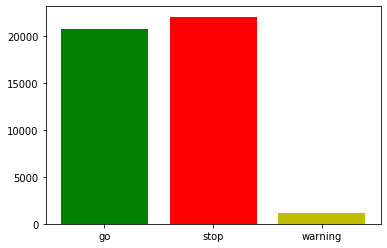

In [43]:
X = df.drop(["filename", "target", "x1", "y1", "x2", "y2"], axis=1)
y = df["target"]

index, counts = np.unique(y, return_counts=True)
colors = ["g", "r", "y"]
plt.bar(index, counts, color=colors)
print(counts)

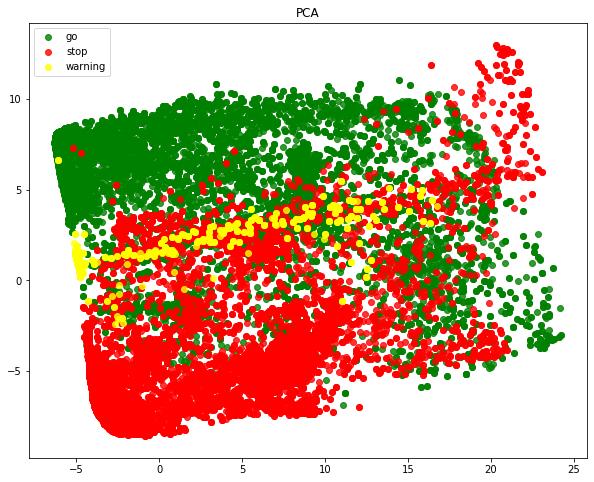

In [7]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X)
y_r = pd.Series(y.values.ravel())

colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10,8))
plt.scatter(X_r[y_r == "go", 0], X_r[y_r == "go", 1], color=colors[0], alpha=.8, label="go")
plt.scatter(X_r[y_r == "stop", 0], X_r[y_r == "stop", 1], color=colors[1], alpha=.8, label="stop")
plt.scatter(X_r[y_r == "warning", 0], X_r[y_r == "warning", 1], color=colors[2], alpha=.8, label="warning")
plt.legend(loc="best")
plt.title('PCA')
plt.show()

# Resample

In [37]:
go_df = df[df["target"] == "go"]
stop_df = df[df["target"] == "stop"]
warning_df = df[df["target"] == "warning"]

In [38]:
n_samples = 500
go_df_r = resample(go_df, replace=True, n_samples=n_samples, random_state=42)
stop_df_r = resample(stop_df, replace=True, n_samples=n_samples, random_state=42)
warning_df_r = resample(warning_df, replace=True, n_samples=n_samples, random_state=42)

[500 500 500]


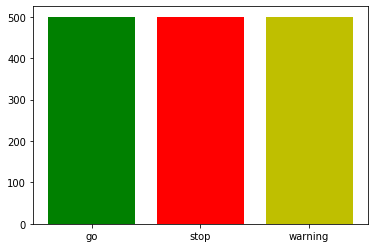

In [40]:
df_r = pd.concat([go_df_r, stop_df_r, warning_df_r])
X_r = df_r.drop(["filename", "target", "x1", "y1", "x2", "y2"], axis=1)
y_r = df_r["target"]

index, counts = np.unique(y_r, return_counts=True)
colors = ["g", "r", "y"]
plt.bar(index, counts, color=colors)
print(counts)

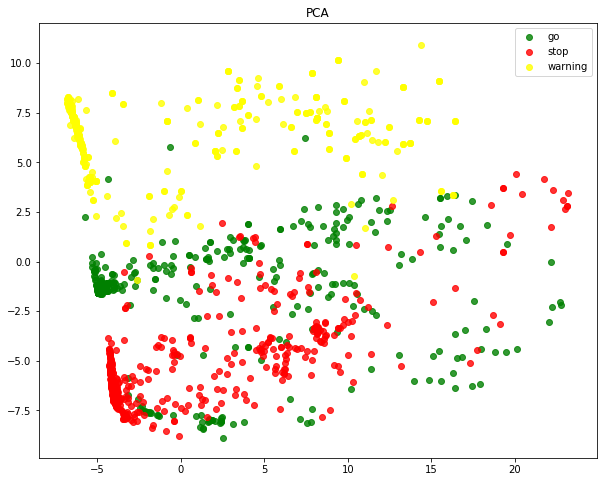

In [41]:
pca = PCA(n_components=2)
X_r_r = pca.fit_transform(X_r)
y_r_r = pd.Series(y_r.values.ravel())

colors = ['green', 'red', 'yellow']
plt.figure(figsize=(10,8))
plt.scatter(X_r_r[y_r_r == "go", 0], X_r_r[y_r_r == "go", 1], color=colors[0], alpha=.8, label="go")
plt.scatter(X_r_r[y_r_r == "stop", 0], X_r_r[y_r_r == "stop", 1], color=colors[1], alpha=.8, label="stop")
plt.scatter(X_r_r[y_r_r == "warning", 0], X_r_r[y_r_r == "warning", 1], color=colors[2], alpha=.8, label="warning")
plt.legend(loc="best")
plt.title('PCA')
plt.show()

In [42]:
kernel = 'poly'
C = 1
gamma = 10
degree = 3
svc = SVC(kernel=kernel, C=C, gamma=gamma, degree=degree).fit(X_r, y_r.values.ravel())

In [44]:
y_pred = svc.predict(X)
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

          go       0.99      0.98      0.98     20789
        stop       0.98      0.99      0.99     22075
     warning       0.93      0.99      0.96      1159

    accuracy                           0.98     44023
   macro avg       0.97      0.99      0.98     44023
weighted avg       0.98      0.98      0.98     44023



# Concusão